# PyTorch
### A gentle introduction to PyTorch

In [1]:
# Importamos módulos/librerías

import torch

import matplotlib.pyplot as plt
import numpy as np

The following line just checks if there is some GPU available and sets the `device` variable accordingly.

In [2]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

Using device: cpu


## Introducing the basic element: *the tensor* 🔥💦🌬🗻

Tensors are the central object in pytorch. They can have a single dimension (vector), 2 dimensions (matrix), or n-dimensions (tensor). They also share a very similar interface to `ndarray`s of the popular `numpy` library. In PyTorch, tensors are represented with the [`Tensor`](https://pytorch.org/docs/stable/tensors.html) object.

Let's create our first pytorch tensors with some default values:

In [3]:
my_tensor = torch.Tensor([0., 1., 2.])
my_tensor

tensor([0., 1., 2.])

\Now that we have created a tensor, let's explore the "must know" attributes or properties that all pytorch tensors have:

In [4]:
print("The size of the tensor is:", my_tensor.size())

print("The type of the tensor is:", my_tensor.dtype)

print("Where is the tensor?", my_tensor.device)

print("Has the gradient property?", my_tensor.requires_grad)

The size of the tensor is: torch.Size([3])
The type of the tensor is: torch.float32
Where is the tensor? cpu
Has the gradient property? False


Note that pytorch tensors have the folowing default properties:
- The tensor is stored in CPU memory.
- By default numbers are stored as 32 bit float.

PyTorch tensors have a very similar interface to numpy's `ndarray`, let's see how to do some basic math operations with tensors:

In [5]:
double = 2 * my_tensor # myltiply a tensor by an scalar
half = my_tensor / 2
triple = double + my_tensor # opertions between tensors

print("Double", double)
print("Half:", half)
print("Triple", triple)

Double tensor([0., 2., 4.])
Half: tensor([0.0000, 0.5000, 1.0000])
Triple tensor([0., 3., 6.])


Pretty easy! right? As you can see, pytorch tensors can be manipulated using standard python operators, leading to cleaner code. But these operations can also be done directly using pytorch library functions ([reference](https://pytorch.org/docs/stable/torch.hztml)):

In [6]:
# Repeat the same operations from the code block above but using pytorch funcitions
double = torch.mul(2., my_tensor)
half = torch.div(my_tensor, 2.)
triple = torch.add(double, my_tensor)

print("Double:", double)
print("Half:", half)
print("Triple:", triple)

Double: tensor([0., 2., 4.])
Half: tensor([0.0000, 0.5000, 1.0000])
Triple: tensor([0., 3., 6.])


In the examples above, we have used a tensor created with some default values, but pytorch offers a wide variety of handy constructors to create our tensors. These are some of the most used ones, but the complete list of constructors can be found [here](https://pytorch.org/docs/stable/torch.html#creation-ops).  

In [7]:
# Create a tensor of 3x3 dimension with all values set to zero
z = torch.zeros(3, 3)
print("--> torch.zeros:\n\n", z)

# A tensor whose values are sampled from a uniform distribution on the [0, 1] range
u = torch.rand((3, 3)) # the shape of the tensor goes between parenthesis here
print("\n--> torch.rand:\n\n", u)

# A tensor whose values are sampled from a (0, 1) normal
n = torch.randn((3, 3))
print("\n--> torch.randn:\n\n", n)

# Returns a 2-D tensor with ones on the diagonal and zeros elsewhere
i = torch.eye(3, 3)
print("\n--> torch.eye:\n\n", i)

# Returns a 2-D tensor with ones 
o = torch.ones(3, 3)
print("\n--> torch.ones:\n\n", o)

--> torch.zeros:

 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

--> torch.rand:

 tensor([[0.6708, 0.0211, 0.2336],
        [0.6785, 0.4314, 0.0915],
        [0.1498, 0.3367, 0.9648]])

--> torch.randn:

 tensor([[-0.3377, -1.5041, -1.9110],
        [-2.1734, -0.6812,  0.0527],
        [ 0.3231, -1.2879, -1.1583]])

--> torch.eye:

 tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

--> torch.ones:

 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


## Where the witchcraft starts 🧙‍♂️: ✨Autograd✨




Remember the code cell in wich we saw the properties of pytorch tensors, the `requires_grad` property of the tensor was set to `False`. This property tells pytorch wheter or not to track the gradient of a tensor. In this section we will see how to use pytorch's Autograd to automatically compute the gradient of a tensor.

Let's start by creating a tensor with some default values and setting its `requires_grad` property:

In [8]:
x = torch.tensor(
    [[1., -1.],
     [-1., 1.]],
    requires_grad=True) # track gradients
x

tensor([[ 1., -1.],
        [-1.,  1.]], requires_grad=True)

Note how this time the `requires_grad` attribute is set to `True`, indicating pytorch to track the operations over it to then be able to compute the gradient. So let's test it! Compute the sum of the squares of the tensor `x`:

In [9]:
x1 = x.pow(2)
print(x1)
out = x1.sum()
out

tensor([[1., 1.],
        [1., 1.]], grad_fn=<PowBackward0>)


tensor(4., grad_fn=<SumBackward0>)

This is already a bit of a spoiler, notice that the resulting `out` tensor doesn't only contain the final value of the operation (`4.0`) but it also contains a property `grad_fn` that is set to an object named `SumBackward0`a. In fact, when operating on a tensor with the `requires_grad` attribute set to `True`, the tensor resulting from any operation on it will contain a `grad_fn` attribute with the derivative function of the applied operation. This way, pytorch is able to construct a graph of the operations that led to a specific tensor to later perform automatic differentiation.

In this example, we will compute the gradient of the tensor `x` with respect to the result of the operation, the tensor `out`. By calling the method `backward` on the `out` tensor, Autograd will traverse the described graph and will compute the gradients of all tensors that led to the tensor `out`.

In [10]:
out.backward()

To access to the gradients of the tensor `x` we simply have to check its `grad` attribute:

In [11]:
x.grad

tensor([[ 2., -2.],
        [-2.,  2.]])

Voilà! Just using 4 lines of code we used Autograd, the automatic differentiation engine of pytorch, to compute automatically the gradients of a tensor<h1>💃🕺</h1>

- 📖 More information on Autograd and how to use it can be found [here](https://pytorch.org/docs/stable/notes/autograd.html).

---

## Linear regression with gradient descent 📈

Now that we have covered the basics of tensors and autograd, we can get into the first proper exercise: linear regression using gradient descent!!!🙌🥳🤓 Not super impressive, but the concepts built in this example perfectly translate to more complex use cases.

<br>
Let's start by creating some data for the sake of the exercise. Note that the contents of this function aren't very relevant right now, but trying to understand it in depth can be a nice exercise for later (once you have become a pytorch ninja 🥷).

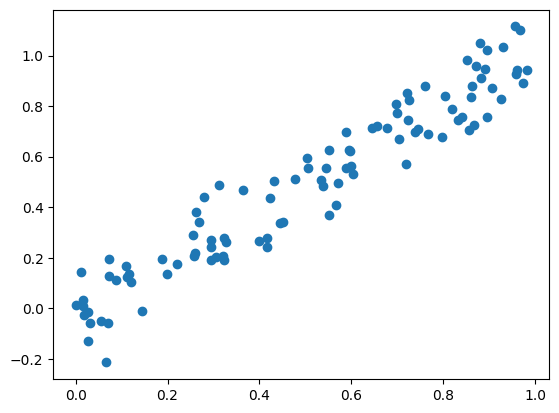

In [12]:
# let's create a function to generate random data.
def data_gen(n_samples=10, x_max=1, intercept=0, noise_gain=0.1):
    # uniformly sample the [0, 1] interval
    x = x_max*torch.rand(n_samples)
    # add some Gaussian noise to x
    y = x + noise_gain*torch.randn(n_samples) + intercept
    return x[:, None], y[:, None]

x, y = data_gen(n_samples=100)
plt.scatter(x, y)

Let's create a loss function to measure the error of our regressor. In this case, we'll use the MSE loss, but feel free to change it. Note the similarity of the function to the example used to illustrate Autograd.

In [13]:
def mse_loss(y_hat, y_target):
    return (y_hat - y_target).pow(2.).mean()

The code cell below just initializes a couple of hyperparameters, and helper variables to log the progress of the trainig process.

In [14]:
# learning rate
lr = 0.1

# maximum number of iterations
iters = 100

# used to log loss values for visualization purposes
loss_values = []
param_values = []

In this case, as the data is 2 dimensional the regressor will have two values: corresponding to the slope and intercept. This parameters will be stored in a single `Tensor` object initialized to random values:

In [15]:
# initialize the parameters of the model
model = torch.randn(2, requires_grad=True)
model

tensor([0.8405, 0.4496], requires_grad=True)

This code block is where all the fun happens: *the training loop*.

Step by step the training loop goes as the following:

1. Given $x$, use the model to compute the estimate $\hat{y}$.
2. Compute the loss value based on the actual $y$ and the estimate $\hat{y}$.
3. Call `.backward()` on the loss value, this way autograd will fill the gradients of the tensors that produced $\hat{y}$.
4. Update the parameters of the model using gradient descent.
5. Reset the gradients of the tensors to zero before the next iteration.

In [16]:
for it in range(iters):
    
    # (1) compute the estimated y values using our model
    y_hat = x * model[0] + model[1]
    
    # (2) compute the error
    loss = mse_loss(y_hat, y)
    
    # just for logging
    loss_values.append(loss.item())
    param_values.append(model.detach().tolist())
    if it % 10 == 0:
        print(f"{it+1}/{   iters} MSE: {loss.item()}")
        
    # (3) use autograd to compute gradients w.r.t the loss
    loss.backward()
    
    with torch.no_grad(): # within this block, autograd is disabled
        # (4) update the parameters of the model
        # note that we don't want autograd to track this operation
        model -= lr*model.grad
        
    # (5) set gradients to zero for the next iteration,
    # otherwise gradiets accumulate
    model.grad.data.zero_()

1/100 MSE: 0.15735551714897156
11/100 MSE: 0.01833084598183632
21/100 MSE: 0.015644118189811707
31/100 MSE: 0.013916976749897003
41/100 MSE: 0.012628785334527493
51/100 MSE: 0.011667425744235516
61/100 MSE: 0.010949972085654736
71/100 MSE: 0.010414541698992252
81/100 MSE: 0.010014955885708332
91/100 MSE: 0.009716746397316456


Plot the data logged during the training process:

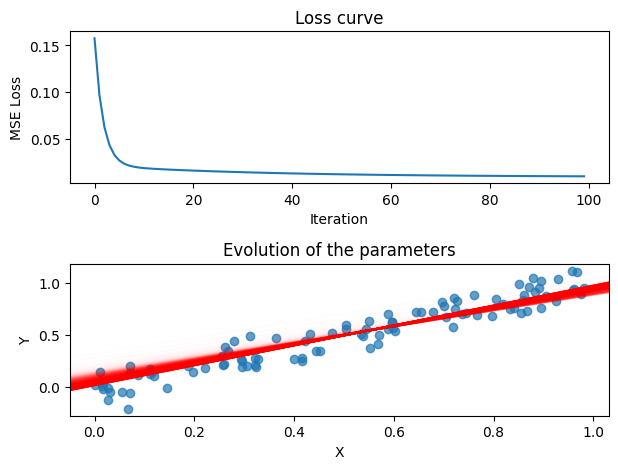

In [18]:
def viz_linear_reg(loss_values, param_values):
    plt.subplot(2, 1, 1)
    plt.plot(loss_values)
    plt.title("Loss curve")
    plt.ylabel("MSE Loss")
    plt.xlabel("Iteration")
    
    plt.subplot(2, 1, 2)
    plt.scatter(x, y, alpha=0.7)
    
    for i, param in enumerate(param_values):
        plt.axline((0, param[1]), slope=param[0],
            color=[1., 0., 0., 0.5*i/len(param_values)])
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Evolution of the parameters")
    plt.tight_layout()
    
viz_linear_reg(loss_values, param_values)